In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 14
# Style plot
# plt.style.use(['science','ieee', 'grid', 'no-latex'])
import os
import numpy as np

if torch.cuda.is_available():
   dev = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc.
   torch.set_default_tensor_type('torch.cuda.FloatTensor')
   print("Running on the GPU")
else:
   dev = torch.device("cpu")
   print("Running on the CPU")


Running on the GPU


In [2]:
T_test = 100
r2_dB = torch.arange(-10,30,5)
r2_inv_dB = r2_dB
nExperiments = len(r2_dB)

# Set array of LQG + MSE loss values for plot
MB_LQG_avg_loss_dB = torch.zeros(1, nExperiments)
LQGNet_avg_loss_dB = torch.zeros(1, nExperiments)

MB_MSE_avg_loss_dB = torch.zeros(1, nExperiments)
LQGNet_MSE_loss_dB = torch.zeros(1, nExperiments)

# Set array of MM SS LGQ + MSE loss values for plot
MM_MB_LQG_avg_loss_dB = torch.zeros(1, nExperiments)
MM_LQGNet_avg_loss_dB = torch.zeros(1, nExperiments)

MM_MSE_avg_loss_dB = torch.zeros(1, nExperiments)
MM_LQGNet_MSE_loss_dB = torch.zeros(1, nExperiments)


# Collect LQG losses vs KF+LQR
for i in range(nExperiments):
   if r2_dB.cpu().detach().numpy()[i] < 0:
      simUseCase = "Linear_Dynamics_T{:,.0f}_r2_negative_{:,.0f}dB".format(T_test,r2_dB[i].abs().cpu().detach().numpy())
      
   elif r2_dB.cpu().detach().numpy()[i] == 0:
      simUseCase = "Linear_Dynamics_T{:,.0f}_r2_{:,.0f}dB".format(T_test,r2_dB[i].abs().cpu().detach().numpy())
      
   else: 
      simUseCase = "Linear_Dynamics_T{:,.0f}_r2_positive_{:,.0f}dB".format(T_test,r2_dB[i].abs().cpu().detach().numpy())
      
   # Where to save the new model
   modelFolder = 'KNet' + os.path.sep + 'Linear_SS_No_MM' + os.path.sep
   modelName = "KNet_" + simUseCase   

   KNet_Pipeline = torch.load(modelFolder + "pipeline_" + modelName + ".pt")
   # Save LQG loss for current experiment
   MB_LQG_avg_loss_dB[0,i] = KNet_Pipeline.LQG_ref_cost
   LQGNet_avg_loss_dB[0,i] = KNet_Pipeline.LQR_test_dB_avg
   MB_MSE_avg_loss_dB[0,i] = KNet_Pipeline.MSE_EKF_ref_dB
   LQGNet_MSE_loss_dB[0,i] = KNet_Pipeline.MSE_test_dB_avg
   # Save LQG loss for mismatch dynamics
   modelFolder = 'KNet' + os.path.sep + os.path.sep
   modelName = "KNet_MM_" + simUseCase   
   KNet_Pipeline = torch.load(modelFolder + "pipeline_" + modelName + ".pt")
   MM_MB_LQG_avg_loss_dB[0,i] = KNet_Pipeline.LQG_ref_cost
   MM_LQGNet_avg_loss_dB[0,i] = KNet_Pipeline.LQR_test_dB_avg
   MM_MSE_avg_loss_dB[0,i] = KNet_Pipeline.MSE_EKF_ref_dB
   MM_LQGNet_MSE_loss_dB[0,i] = KNet_Pipeline.MSE_test_dB_avg


MB_LQG_avg_loss_dB = torch.fliplr(MB_LQG_avg_loss_dB)
LQGNet_avg_loss_dB = torch.fliplr(LQGNet_avg_loss_dB)
MB_MSE_avg_loss_dB = torch.fliplr(MB_MSE_avg_loss_dB)
LQGNet_MSE_loss_dB = torch.fliplr(LQGNet_MSE_loss_dB)
MM_MB_LQG_avg_loss_dB = torch.fliplr(MM_MB_LQG_avg_loss_dB)
MM_LQGNet_avg_loss_dB = torch.fliplr(MM_LQGNet_avg_loss_dB)
MM_MSE_avg_loss_dB = torch.fliplr(MM_MSE_avg_loss_dB)
MM_LQGNet_MSE_loss_dB = torch.fliplr(MM_LQGNet_MSE_loss_dB)

print('Done')


using GPU!
Done


In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

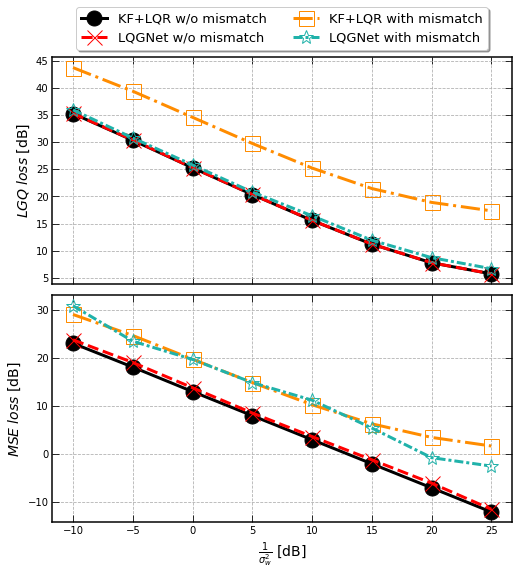

In [11]:
# Scale font parameters
legendScale = 12
fontScale = 20
msScale = 15
lwScale = 3
# Prepare multiple plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(8,8))

ax1.tick_params(direction='in', which='minor', length=5, 
                left=True, right=True, top=True, bottom=True)
ax1.tick_params(direction='in', which='major', length=7, 
                left=True, right=True, top=True, bottom=True)

ax2.tick_params(direction='in', which='minor', length=5, 
                left=True, right=True, top=True, bottom=True)
ax2.tick_params(direction='in', which='major', length=7, 
                left=True, right=True, top=True, bottom=True)
# Make subplots box thicker
[x.set_linewidth(1.5) for x in ax1.spines.values()]
[x.set_linewidth(1.5) for x in ax2.spines.values()]

# ----------------- PLOT LGQ ------------------
ax1.plot(r2_inv_dB.cpu(), MB_LQG_avg_loss_dB[0,:].cpu(), 'o-', color='black', lw=lwScale, ms=msScale, label='KF+LQR w/o mismatch')
ax1.plot(r2_inv_dB.cpu(), LQGNet_avg_loss_dB[0,:].cpu(), 'x--', color='red', lw=lwScale, ms=msScale, label='LQGNet w/o mismatch')

ax1.plot(r2_inv_dB.cpu(), MM_MB_LQG_avg_loss_dB[0,:].cpu(), 's', linestyle='dashdot', color='darkorange', markerfacecolor='none', lw=lwScale, ms=msScale, label='KF+LQR with mismatch')
ax1.plot(r2_inv_dB.cpu(), MM_LQGNet_avg_loss_dB[0,:].cpu(), '*', linestyle=(0, (3,1,1,1)), color='lightseagreen', markerfacecolor='none', lw=lwScale, ms=msScale, label='LQGNet with mismatch')


ax2.plot(r2_inv_dB.cpu(), MB_MSE_avg_loss_dB[0,:].cpu(), 'o-', color='black', lw=lwScale, ms=msScale, label='KF+LQR w/o mismatch')
ax2.plot(r2_inv_dB.cpu(), LQGNet_MSE_loss_dB[0,:].cpu(), 'x--', color='red', lw=lwScale, ms=msScale, label='LQGNet w/o mismatch')

ax2.plot(r2_inv_dB.cpu(), MM_MSE_avg_loss_dB[0,:].cpu(), 's', linestyle='dashdot', color='darkorange', markerfacecolor='none', lw=lwScale, ms=msScale, label='KF+LQR with mismatch')
ax2.plot(r2_inv_dB.cpu(), MM_LQGNet_MSE_loss_dB[0,:].cpu(), '*', linestyle=(0, (3,1,1,1)), color='lightseagreen', markerfacecolor='none', lw=lwScale, ms=msScale, label='LQGNet with mismatch')

ax1.grid(True, linestyle='--')
ax2.grid(True, linestyle='--')

# Shrink current axis by 20%
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.5, box1.height])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.5, box2.height])

# This would be the joint legend for both subplots
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fancybox=True, shadow=True, fontsize=13)

ax1.set_ylabel('$LGQ \; loss$ [dB]', fontsize=14)
ax2.set_ylabel('$MSE\;loss$ [dB]', fontsize=14)
ax2.set_xlabel(r"$\frac{1}{\sigma_w^2}$ [dB]", fontsize=14)

# Finalize plot
plt.tight_layout()
plt.show()
fig_path = 'Knet' + os.path.sep + 'LQG_MSE_Performance_ICASSP.pdf'
fig.savefig(fig_path, bbox_inches="tight")

### Trajectory: (1) x_true (2) x_mm_true (3) x_Net_true

In [7]:
# ---------------------------------------------------------------------------
s_Net_true = torch.tensor([[10.0000,  7.9194,  5.9962,  4.7319,  1.6973,  2.6767, -1.5802, -1.8715,
         -1.5848, -0.8616, -0.0115, -1.8245, -3.3215, -3.3490, -3.4863, -2.4901,
         -0.4300, -1.6187, -3.5692, -4.3194, -4.9800, -4.3631, -2.6320, -1.3875,
         -1.1207, -1.7446, -2.7069, -2.6605, -2.9927, -3.5606, -3.4938, -2.7511,
         -1.9082, -2.5897, -2.3934, -2.8720, -2.8259, -2.2394, -1.0913, -3.1378,
         -2.4302, -2.5264, -4.1368, -4.0732, -2.8566, -0.9176,  0.0982, -0.1609,
         -1.6257, -4.1601, -2.8142,  1.5381, -0.7015, -3.1638, -1.1659, -1.4599,
         -2.0910, -4.1529, -3.6943, -2.8079, -5.0335, -1.8233, -2.5343, -5.2032,
         -4.2434,  0.7714,  1.0688, -0.2963,  0.5519,  0.1594, -0.1887,  1.0668,
          0.6173, -2.9705, -0.0782,  0.4074,  2.5160,  0.9363, -3.3329, -0.8468,
         -0.5066,  0.1991,  1.9685,  1.3427,  1.8970,  2.6148,  0.9714,  1.0872,
          2.0196,  2.1014,  1.0691, -1.3829,  1.2539,  0.4336,  0.7957,  0.9543,
          1.5642,  3.6873, -0.2741,  0.2120,  3.5165],
        [ 0.0000, -2.2108, -3.0977, -2.7797,  3.4716, -5.0027, -0.2277,  2.6388,
          2.0051,  0.2750, -1.0950, -1.5042, -1.3315,  2.2951,  1.4678,  2.0543,
         -0.4032, -2.4465, -2.0691, -1.0983, -0.4443, -0.2333, -0.0427, -0.6511,
         -2.0271, -2.4572,  0.5703,  0.8098, -0.3494, -0.4052,  2.6907,  1.9177,
          0.9237, -0.3416,  1.7958,  0.4323,  0.4278, -0.1676, -2.6429, -0.4341,
          1.3960, -1.9600, -1.6712, -0.0364,  1.4470, -0.1951, -1.8607,  0.4856,
         -2.9888,  2.7121,  2.1061, -1.2293, -0.8148,  4.1191, -0.6985, -2.2711,
          0.0645,  1.3490,  1.9081, -2.2294,  3.3331, -0.5636, -2.7702, -3.5138,
          7.2300, -1.5863, -1.1705,  2.6212, -2.0952, -0.8087,  1.6290, -2.0014,
         -2.9063,  4.0129,  0.3002,  3.2095, -0.1883, -4.9408,  0.3234,  0.2808,
         -0.4103, -0.8298, -1.2312,  0.0524, -0.4638, -0.3340,  0.1536, -0.9937,
         -0.1605,  0.1662, -3.1329,  2.8197, -2.6650,  1.9910, -1.0554, -0.8244,
          3.0496, -3.8966, -0.3499,  3.1110,  0.1014]])


# ------------------------------------------------------------------------------
s_mm_true = torch.tensor([[ 1.0000e+01,  7.9194e+00,  5.9962e+00,  6.7101e+00,  5.5881e+00,
          7.2579e+00,  6.3785e+00,  7.3703e+00,  7.8107e+00,  8.2420e+00,
          9.3684e+00,  8.2824e+00,  7.6375e+00,  7.6291e+00,  6.3627e+00,
          7.0298e+00,  8.8139e+00,  7.8512e+00,  6.3244e+00,  5.9787e+00,
          4.6016e+00,  4.2083e+00,  4.6426e+00,  4.6104e+00,  4.2763e+00,
          3.6003e+00,  2.1084e+00,  9.4400e-01, -7.9969e-02, -7.0670e-01,
         -5.8432e-01, -3.0861e-01,  2.9444e-01, -1.7434e-01,  7.1404e-01,
          5.6640e-02, -2.1203e-01,  4.9531e-01,  9.3036e-01, -9.5988e-01,
         -9.7508e-01, -1.7981e+00, -3.3628e+00, -3.3391e+00, -2.9388e+00,
         -1.2687e+00, -7.3734e-01, -1.2308e+00, -3.3182e+00, -5.6902e+00,
         -5.3234e+00, -1.1596e+00, -2.7716e+00, -4.8710e+00, -3.6349e+00,
         -3.3586e+00, -3.6514e+00, -6.4495e+00, -7.1765e+00, -6.7885e+00,
         -8.3080e+00, -6.1979e+00, -6.7065e+00, -9.0973e+00, -7.8060e+00,
         -5.1147e+00, -4.4524e+00, -6.1392e+00, -6.2693e+00, -5.9587e+00,
         -5.9434e+00, -5.2629e+00, -5.3698e+00, -8.4175e+00, -6.8868e+00,
         -5.9675e+00, -4.2686e+00, -5.3232e+00, -8.2263e+00, -6.2079e+00,
         -6.4330e+00, -6.0718e+00, -4.5202e+00, -5.4388e+00, -4.9174e+00,
         -3.9849e+00, -5.5309e+00, -5.4905e+00, -4.3810e+00, -3.9035e+00,
         -4.0658e+00, -5.3710e+00, -3.0454e+00, -2.5313e+00, -2.5349e+00,
         -2.2323e+00, -1.5812e+00, -2.0032e-01, -3.0260e+00, -2.8605e+00,
         -4.1019e-01],
        [ 0.0000e+00, -2.2108e+00,  2.1214e-01,  6.2003e-01,  5.0194e+00,
          1.1106e+00,  2.7222e+00,  3.8286e+00,  2.4648e+00,  1.6558e+00,
          1.0678e+00,  9.4122e-01, -1.9341e-01,  1.5136e+00,  1.9108e+00,
          2.5533e+00,  9.0761e-01, -7.8197e-01, -3.9412e-01, -1.2581e+00,
         -1.1675e+00, -1.5383e+00, -1.4449e+00, -1.0513e+00, -1.5695e+00,
         -2.8042e+00, -9.6950e-01,  1.5936e-02, -1.5394e-01, -2.4219e-02,
          2.2029e+00,  1.7630e+00,  1.5019e+00,  1.0601e+00,  1.8103e+00,
          2.0119e-01,  8.9371e-01, -1.0848e+00, -2.1775e+00, -1.4237e+00,
          3.2678e-01, -1.8101e+00, -1.6598e+00, -1.3281e+00,  9.8881e-01,
         -1.0412e+00, -2.3371e+00, -6.6411e-01, -2.8879e+00,  9.1953e-01,
          1.5375e+00, -4.5147e-01, -4.1661e-01,  2.6722e+00,  6.6216e-03,
         -1.8966e+00, -1.3248e+00, -8.6624e-01,  7.2270e-01, -1.4496e+00,
          1.1620e+00, -6.6622e-01, -2.7260e+00, -3.3520e+00,  2.9829e+00,
         -1.5696e+00, -2.2658e+00,  3.9478e-01, -1.6071e+00, -8.1800e-01,
          8.6273e-02, -2.0668e+00, -2.6069e+00,  1.1852e+00,  3.3866e-01,
          1.8808e+00,  5.7749e-03, -3.2867e+00, -9.5298e-01, -1.2058e+00,
         -1.5848e+00, -1.8270e+00, -2.3757e+00, -6.8700e-01, -7.9208e-01,
         -8.3687e-01, -6.2880e-01, -1.3610e+00, -1.4435e-01,  1.0159e+00,
         -1.7322e+00,  1.8967e+00, -8.6626e-01,  1.0800e+00, -1.1505e+00,
         -1.0770e+00,  1.4903e+00, -2.3886e+00, -1.1640e+00,  1.3717e+00,
          2.8737e-01]])



# ------------------------------------------------------------------------------
s_true = torch.tensor([[10.0000,  7.9194,  4.0282,  2.2685, -0.1911,  1.0119, -0.6797, -0.5774,
         -0.1578,  0.5940,  1.6325,  0.1749, -0.8147, -1.1068, -2.2486, -1.1951,
          0.8617,  0.0488, -1.8331, -2.6143, -3.9497, -3.6402, -2.0677, -1.0747,
         -0.7374, -1.0342, -2.1293, -2.5728, -2.6480, -2.6921, -2.2649, -1.3145,
         -0.1099, -0.5303,  0.2000, -0.5697, -1.0149, -0.2430,  0.4929, -1.5222,
         -1.7746, -2.1042, -3.2847, -3.1990, -2.2565,  0.3218,  1.4566,  0.9586,
         -1.2556, -3.9204, -3.2705,  1.7279,  0.5422, -1.8065, -0.6064, -0.1244,
         -0.6292, -3.4695, -3.7605, -2.7376, -3.9860, -1.3405, -1.1843, -3.6241,
         -2.5475,  1.2762,  2.9883,  1.2808,  1.1028,  1.0047,  0.4653,  1.2313,
          1.0651, -2.4925, -0.8976,  0.5244,  2.5702,  1.2722, -2.6374, -0.9434,
         -0.6660,  0.0665,  1.8315,  0.8266,  1.2862,  2.1848,  0.4635,  0.2274,
          0.9550,  1.2499,  0.8405, -1.1026,  1.0216,  1.5966,  1.5361,  1.5407,
          1.9007,  3.5524,  0.5072, -0.0241,  2.4213],
        [ 0.0000, -5.5035, -4.1253, -2.0661,  3.6552, -0.8785,  0.5216,  2.9917,
          2.1971,  0.7370, -0.3345, -0.4535, -1.5210,  0.8405,  1.6886,  2.1794,
          0.3559, -2.1634, -1.9460, -2.0553, -0.8545, -0.4258, -0.4066, -0.5015,
         -1.4411, -2.6078, -0.1910,  1.2485,  0.5618,  0.2855,  3.1621,  2.6679,
          1.5420,  0.7598,  1.5705, -0.1574,  0.9207, -0.6559, -2.4306, -1.8773,
          1.0716, -1.1981, -1.5482, -0.4068,  2.5774,  0.1289, -2.1234, -0.6553,
         -3.1695,  1.5716,  3.1412,  0.5532, -0.4994,  2.9213,  0.6562, -1.9249,
         -1.0904,  0.1639,  2.1297, -0.5872,  2.4939,  0.9361, -2.2507, -3.1591,
          5.4081,  0.8317, -1.5496,  1.0634, -1.5471, -1.0434,  0.8759, -1.5108,
         -2.8108,  1.8904,  1.7842,  3.1162,  0.2886, -4.3053, -0.9317,  0.1660,
         -0.3816, -0.8506, -1.8792, -0.1582, -0.2229, -0.5076, -0.4865, -1.4229,
          0.0885,  1.1225, -2.3043,  1.9902, -0.3538,  1.4013, -1.2384, -1.1832,
          2.2947, -2.3772, -1.9735,  1.6497,  1.0006]])

In [13]:
# ---------------------------------------------------------------------------
s_Net_true = torch.tensor([[10.0000, 10.3505,  7.9038,  5.2151,  2.4053,  3.8115,  3.8602,  2.7456,
          0.6179,  3.5972,  4.4615,  4.2140,  2.3080,  1.6906,  0.2896,  2.4263,
          0.0459,  0.1507, -1.7188, -2.6417, -1.0964, -2.5038, -1.9506, -2.1844,
         -4.7737, -4.4669, -7.9672, -5.9017, -5.7197, -5.8493, -4.3859, -1.8629,
         -1.4356, -0.0511, -0.9783, -0.0362,  1.5298,  4.8744,  2.2867,  2.2286,
          1.9197,  0.7713,  1.1779, -0.4823,  2.0231,  3.3759,  3.2488, -0.6058,
         -2.0069, -1.2988, -0.4236, -0.1921,  1.2325,  1.0794,  0.3155,  0.3065,
          0.3302, -1.0848, -0.3823, -0.6679,  1.2178,  2.9176,  0.8345, -1.5662,
         -2.5668, -1.3983, -1.9898, -2.1601, -4.3866, -3.6242, -3.0082, -1.7434,
         -1.2350, -1.3387, -0.1875, -0.2963, -0.0571,  1.8559,  1.1891, -0.1325,
          1.7348,  1.9458,  1.9382,  3.9802,  7.1180,  5.8500,  4.3047,  2.8008,
          5.7953,  5.7291,  3.8616,  6.3781,  6.9009,  3.1224,  3.3131,  1.4092,
         -0.4849,  1.7993,  1.0954,  0.2700,  0.0328],
        [ 0.0000, -1.7480, -3.5731, -5.0574,  2.2185, -3.3443, -1.4274, -0.8287,
          3.5284, -0.4326, -0.6799, -2.2516, -1.2026, -2.8583,  2.5095, -1.1121,
         -0.7840, -1.6137, -3.6733,  3.7126,  0.1750,  2.2269,  0.7192, -2.9997,
         -0.1319, -4.6545,  1.5890,  0.4590,  2.0344, -0.4848,  3.1478,  1.1405,
          0.5041, -0.4765,  0.0406,  0.1345,  5.7149, -4.2124,  0.5478, -1.8574,
         -1.6406,  1.8619, -3.8246,  2.8360, -0.1500,  1.5243, -3.8749, -0.2600,
          0.2180,  3.2957,  0.1048,  1.3495,  0.5354, -1.9258,  1.0952, -0.1996,
         -0.4259, -0.2264,  0.7784,  2.2160,  3.8876, -2.4831, -4.1653,  1.0958,
          2.0530, -0.8885, -1.8787, -1.3485,  2.6009, -0.5082,  3.3232, -0.6945,
         -1.2932,  0.7176, -2.5147, -0.0854,  2.5695,  0.8935, -4.8118,  1.8120,
         -0.7734, -0.9854,  0.4668,  2.2007, -1.9931, -0.3817, -3.6178,  2.7603,
         -2.0603, -2.4310,  1.8486, -1.5846, -3.8038, -0.4419, -2.0236, -3.4401,
          4.7550, -1.1010, -3.2803,  1.0225,  1.3703]])


# ------------------------------------------------------------------------------
s_mm_true = torch.tensor([[ 1.0000e+01,  1.0351e+01,  7.9038e+00,  8.1546e+00,  7.9458e+00,
          9.1541e+00,  1.1099e+01,  1.0708e+01,  8.6700e+00,  1.1447e+01,
          1.3902e+01,  1.4806e+01,  1.3561e+01,  1.3795e+01,  1.3116e+01,
          1.4244e+01,  1.2073e+01,  1.1926e+01,  1.0571e+01,  1.0345e+01,
          1.0548e+01,  9.3703e+00,  9.3466e+00,  8.5614e+00,  6.5486e+00,
          6.2188e+00,  2.3542e+00,  2.7153e+00,  2.4620e+00,  1.3212e+00,
          2.8074e+00,  4.2831e+00,  3.9366e+00,  4.7342e+00,  3.5694e+00,
          4.4284e+00,  6.2605e+00,  8.7604e+00,  7.7387e+00,  8.1113e+00,
          8.2607e+00,  6.8380e+00,  6.5142e+00,  5.9924e+00,  8.0879e+00,
          9.8556e+00,  9.7045e+00,  7.3228e+00,  6.1495e+00,  6.9896e+00,
          7.5569e+00,  8.6287e+00,  1.0513e+01,  1.0976e+01,  1.1129e+01,
          1.0834e+01,  1.0943e+01,  9.3552e+00,  9.8236e+00,  9.0377e+00,
          1.0561e+01,  1.2316e+01,  1.1602e+01,  1.0269e+01,  8.9669e+00,
          1.0065e+01,  1.0008e+01,  1.0208e+01,  8.0044e+00,  7.5671e+00,
          8.2756e+00,  8.7810e+00,  1.0105e+01,  1.0741e+01,  1.1208e+01,
          1.1130e+01,  1.1038e+01,  1.2324e+01,  1.1900e+01,  1.1790e+01,
          1.3289e+01,  1.3856e+01,  1.4428e+01,  1.6750e+01,  2.0157e+01,
          2.0546e+01,  1.9672e+01,  1.9765e+01,  2.2939e+01,  2.4327e+01,
          2.3778e+01,  2.6092e+01,  2.8468e+01,  2.6085e+01,  2.6391e+01,
          2.5023e+01,  2.4020e+01,  2.5134e+01,  2.5674e+01,  2.6282e+01,
          2.5526e+01],
        [ 0.0000e+00, -1.7480e+00,  1.3452e+00, -4.0898e-01,  2.4465e+00,
          3.6673e-01,  5.1527e-01,  1.2403e-01,  4.0026e+00,  3.0213e+00,
          2.1994e+00, -7.7671e-02,  1.3570e+00, -4.2874e-01,  2.1167e+00,
          4.3102e-01,  7.5130e-03,  4.3578e-01, -1.2672e+00,  2.7775e+00,
          1.7336e+00,  2.4597e+00,  9.3656e-01, -9.5089e-01, -5.4458e-02,
         -4.1858e+00, -2.2124e-01,  6.0023e-01,  1.1680e+00,  2.7689e-01,
          2.1213e+00,  4.6595e-01,  6.4268e-02, -3.9121e-01,  3.6039e-01,
          1.0303e+00,  4.7788e+00, -1.2000e+00,  1.8185e+00, -4.9694e-01,
         -1.4596e+00,  1.2519e+00, -1.3816e+00,  2.8036e+00,  1.1562e+00,
          2.1379e+00, -7.5906e-01,  9.2119e-01,  1.2618e+00,  3.6169e+00,
          2.3161e+00,  3.0088e+00,  2.5026e+00,  6.0747e-01,  1.7065e+00,
          1.0057e+00,  3.5618e-01,  4.3536e-01,  9.7109e-01,  2.5883e+00,
          4.9230e+00,  7.5658e-01, -1.2925e+00,  1.7854e+00,  3.0997e+00,
          1.1611e+00, -4.7429e-02, -6.2435e-02,  1.8438e+00,  7.7585e-01,
          3.1912e+00,  1.7316e+00,  1.0887e+00,  7.9289e-01, -1.3131e+00,
          5.1185e-01,  2.6414e+00,  2.3551e+00, -1.7037e+00,  2.3991e+00,
          9.8805e-01,  1.1858e+00,  2.1962e+00,  3.9390e+00,  2.0947e+00,
          2.2253e+00,  6.0430e-01,  4.7723e+00,  2.1035e+00,  1.6507e+00,
          3.5202e+00,  3.5052e+00,  7.0642e-01,  2.0689e+00,  1.2020e+00,
          4.3324e-01,  5.2695e+00,  3.3352e+00,  1.5970e+00,  2.7794e+00,
          5.9813e+00]])



# ------------------------------------------------------------------------------
s_true = torch.tensor([[10.0000, 10.3505,  5.9358,  3.6811,  1.8154,  2.2385,  3.6723,  2.8155,
          0.1893,  2.4505,  4.5638,  4.8084,  2.2650,  1.3742,  0.2823,  1.4887,
         -0.5375, -0.8190, -2.1529, -2.2058, -1.3805, -1.7396, -1.1127, -1.5869,
         -3.6629, -3.7756, -7.1978, -5.7173, -4.2848, -4.0018, -1.5739,  1.0329,
          1.4470,  2.2516,  0.8882,  1.4503,  2.8955,  5.3762,  3.3803,  2.3285,
          1.7086, -0.1267, -0.4835, -1.1987,  1.0049,  3.1525,  2.9487, -0.3088,
         -2.5092, -1.7534, -0.6629,  0.5350,  2.3158,  2.5630,  1.9527,  0.9506,
          0.8334, -0.6953, -0.2035, -0.9119,  0.9152,  3.1926,  2.0182, -0.7793,
         -2.7557, -1.2536, -0.9138, -0.6681, -2.7355, -2.5910, -1.3293, -0.1550,
          1.3670,  1.7424,  1.8938,  1.2017,  0.7345,  2.0978,  1.6555,  0.7440,
          1.6685,  2.1237,  2.3304,  4.1366,  7.0621,  6.5844,  4.2709,  2.7447,
          5.1121,  5.8400,  4.1416,  5.2672,  6.5945,  3.1038,  2.4088,  0.2586,
         -1.5646, -0.3585,  0.5545,  1.0650,  0.1220],
        [ 0.0000, -5.0407, -3.0456, -3.6324,  0.5141, -1.1856, -1.0150, -1.6558,
          2.2838,  1.5414,  0.1536, -3.2580, -1.6644, -2.3729,  0.9522, -0.6142,
         -1.4892, -0.8153, -2.2617,  2.5522,  1.9003,  2.4273,  0.4014, -2.0805,
         -0.7216, -4.4542,  0.6880,  2.5698,  2.8696,  1.3154,  3.5715,  1.4107,
         -0.1752, -0.9740, -0.4069,  0.0823,  4.4073, -3.1716, -1.0046, -2.3675,
         -2.8112,  0.4940, -2.4113,  2.2588,  1.0771,  1.3734, -2.9062, -1.5673,
          0.2470,  3.6100,  1.6977,  2.0188,  1.3144, -1.5190, -0.4012, -0.3704,
         -0.5653, -0.5397,  0.0892,  2.0933,  4.8234, -0.9348, -4.7099, -0.4575,
          2.5923,  0.6842, -1.0740, -0.9318,  1.7337,  0.6764,  3.3412,  1.1616,
         -0.2290, -0.6444, -3.2804, -1.1163,  1.7297,  1.2935, -4.0786,  0.3230,
         -0.3715, -0.6089,  0.1119,  1.8613, -0.6765, -1.5929, -3.6586,  1.7054,
         -0.8005, -2.1370, -0.4503, -0.3506, -3.3533, -1.9255, -2.5271, -3.4375,
          2.8421,  1.3866, -1.0996, -0.0783,  1.1529]])

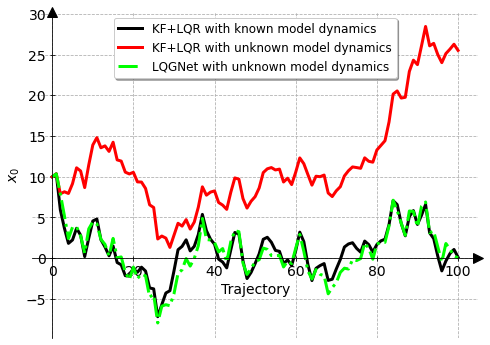

In [95]:
# Set graphs parameters
fontScale = 14
legendScale = 12
msScale = 15
lwScale = 3

# fig, ax = plt.subplots(figsize=(8,6))
# from mpl_toolkits.axisartist.axislines import SubplotZero
# fig = plt.figure(figsize=(8,6))
# ax = SubplotZero(fig, 111)
# fig.add_subplot(ax)


rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(s_true[0,:].cpu(), color='black', lw=lwScale, ms=msScale, label='KF+LQR with known model dynamics')
    ax.plot(s_mm_true[0,:].cpu(), color='red', lw=lwScale, ms=msScale, label='KF+LQR with unknown model dynamics')
    ax.plot(s_Net_true[0,:].cpu(), linestyle='dashdot', color='lime', lw=lwScale, ms=msScale, label='LQGNet with unknown model dynamics')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True, linestyle='--')
    # make arrows
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    
    ax.set_xlabel('Trajectory', fontsize=fontScale)
    ax.set_ylabel(r'$x_0$', fontsize=fontScale)
    ax.legend(loc='upper center', fancybox=True, shadow=True, fontsize=legendScale, ncol=1)
    ax.tick_params(labelsize=14)
    
    plt.show()
    

fig.tight_layout()
# Set size of x and y ticks
# ax.xaxis.set_tick_params(labelsize=fontScale)
# ax.yaxis.set_tick_params(labelsize=fontScale)
# Set grid plot
# ax.grid(True, linestyle='--')


# for direction in ["xzero", "yzero"]:
#     # adds arrows at the ends of each axis
#     ax.axis[direction].set_axisline_style("-|>")
#     # adds X and Y-axis from the origin
#     ax.axis[direction].set_visible(True)
# for direction in ["left", "right", "bottom", "top"]:
#     # hides borders
#     ax.axis[direction].set_visible(False)

# # # Make axis more thicker
# # [x.set_linewidth(3) for x in ax.spines.values()]
# # # Hide the right and top spines
# # ax.spines.right.set_visible(False)
# # ax.spines.top.set_visible(False)

# # plt.tick_params(direction='in', right=True, top=True, bottom=True, length=5)

# # ax.xaxis.set_tick_params(fontsize=15)
# # ax.yaxis.set_tick_params(labelsize=15)
# # ----------------- PLOT LGQ ------------------
# ax.plot(s_true[0,:].cpu(), color='black', lw=lwScale, ms=msScale, label='KF+LQR with known model dynamics')
# ax.plot(s_mm_true[0,:].cpu(), color='red', lw=lwScale, ms=msScale, label='KF+LQR with unknown model dynamics')
# ax.plot(s_Net_true[0,:].cpu(), linestyle='dashdot', color='lime', lw=lwScale, ms=msScale, label='LQGNet with unknown model dynamics')


# plt.legend(loc='upper center', fancybox=True, shadow=True, fontsize=legendScale, ncol=1)
# # fig.legend(loc='upper center', fancybox=True, shadow=True, fontsize=legendScale, ncol=1)
# # plt.xlabel('Trajectory', fontsize=fontScale)
# ax.set_xlabel('Trajectory', fontsize=fontScale)
# ax.set_ylabel(r'$X_0$', fontsize=fontScale)
# # plt.ylabel('$X_0$', fontsize=fontScale)
# ax.tick_params(labelsize=20)
# #----------------------------------------------


# plt.show()
fig_path = 'Knet' + os.path.sep + 'Trajectory_Performance_ICASSAP.pdf'
# fig.savefig(fig_path, bbox_inches="tight")
fig.savefig(fig_path)

In [ ]:
# Scale font parameters
legendScale = 10

# Prepare multiple plot
fig = plt.figure(1, figsize=(5,5))
gs = gridspec.GridSpec(4,4)
gs.update(wspace=0.5, hspace=0.5)

# Generate first panel 
first_subplot = fig.add_subplot(gs[0:2,0:4])
# Provide info on tick params
xticks = np.arange(-10,30,5)
plt.minorticks_on()
plt.tick_params(direction='in', which='minor', length=5, 
                left=True, right=True, top=True, bottom=True)
plt.tick_params(direction='in', which='major', length=10, 
                left=True, right=True, top=True, bottom=True)

plt.xticks(xticks)



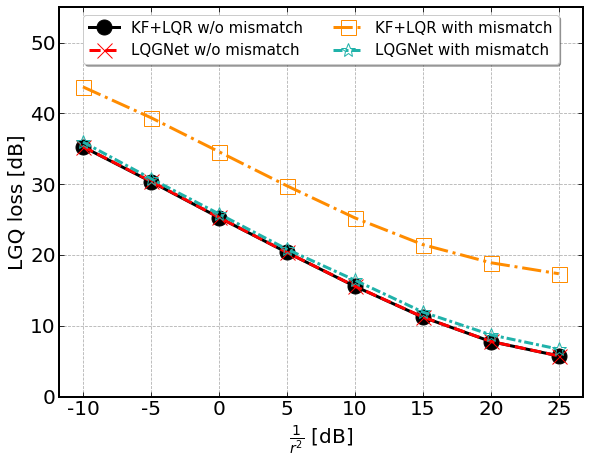

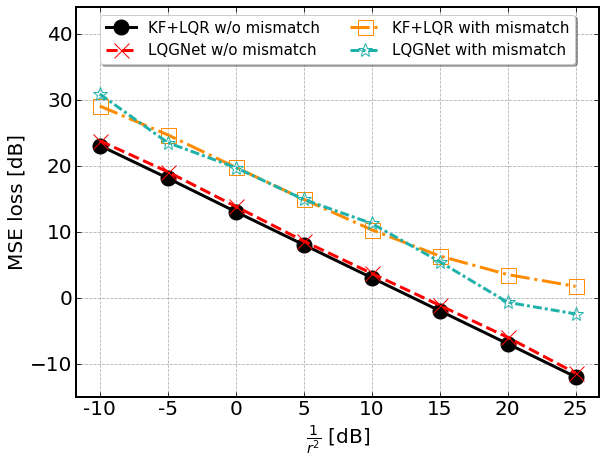

In [66]:
# Set graphs parameters
fontScale = 20
legendScale = 15
msScale = 15
lwScale = 3
fig, ax = plt.subplots(figsize=(8,6))
fig.tight_layout()
# Set size of x and y ticks
ax.xaxis.set_tick_params(labelsize=fontScale)
ax.yaxis.set_tick_params(labelsize=fontScale)
# Set specific ticks
x_ticks = np.arange(-10,30,5)
ax.set_xticks(x_ticks, labels=['-10', '-5', '0', '5', '10', '15','20','25'])
# Set grid plot
ax.grid(True, linestyle='--')
# Set y-lim
ax.set_ylim(0,55)
# Make axis more thicker
[x.set_linewidth(2) for x in ax.spines.values()]

plt.tick_params(direction='in', right=True, top=True, bottom=True, length=5)
# ----------------- PLOT LGQ ------------------
# First, fliplr 
plt.plot(r2_inv_dB.cpu(), MB_LQG_avg_loss_dB[0,:].cpu(), 'o-', color='black', lw=lwScale, ms=msScale, label='KF+LQR w/o mismatch')
plt.plot(r2_inv_dB.cpu(), LQGNet_avg_loss_dB[0,:].cpu(), 'x--', color='red', lw=lwScale, ms=msScale, label='LQGNet w/o mismatch')

plt.plot(r2_inv_dB.cpu(), MM_MB_LQG_avg_loss_dB[0,:].cpu(), 's', linestyle='dashdot', color='darkorange', markerfacecolor='none', lw=lwScale, ms=msScale, label='KF+LQR with mismatch')
plt.plot(r2_inv_dB.cpu(), MM_LQGNet_avg_loss_dB[0,:].cpu(), '*', linestyle=(0, (3,1,1,1)), color='lightseagreen', markerfacecolor='none', lw=lwScale, ms=msScale, label='LQGNet with mismatch')

plt.legend(loc='upper center', fancybox=True, shadow=True, fontsize=legendScale, ncol=2)
plt.xlabel(r'$\frac{1}{r^2}$ [dB]', fontsize=fontScale)
plt.ylabel('LGQ loss [dB]', fontsize=fontScale)
#----------------------------------------------

plt.show()
fig_path = 'Knet' + os.path.sep + 'LQGNet_performance_ICASSP.pdf'
fig.savefig(fig_path, bbox_inches="tight")
#----------------------------------------------
#----------------------------------------------

fig, ax = plt.subplots(figsize=(8,6))
fig.tight_layout()
# Set size of x and y ticks
ax.xaxis.set_tick_params(labelsize=fontScale)
ax.yaxis.set_tick_params(labelsize=fontScale)
# Set specific ticks
x_ticks = np.arange(-10,30,5)
ax.set_xticks(x_ticks, labels=['-10', '-5', '0', '5', '10', '15','20','25'])
# Set grid plot
ax.grid(True, linestyle='--')
# Set y-lim
minY = torch.floor(MB_MSE_avg_loss_dB.min()-2)
maxY = torch.floor(MM_MSE_avg_loss_dB.max()+15)
ax.set_ylim(minY.cpu(),maxY.cpu())
# Make axis more thicker
[x.set_linewidth(2) for x in ax.spines.values()]

# Set ticks direction and length
plt.tick_params(direction='in', right=True, top=True, bottom=True, length=5)
# PLOT graphs
plt.plot(r2_inv_dB.cpu(), MB_MSE_avg_loss_dB[0,:].cpu(), 'o-', color='black', lw=lwScale, ms=msScale, label='KF+LQR w/o mismatch')
plt.plot(r2_inv_dB.cpu(), LQGNet_MSE_loss_dB[0,:].cpu(), 'x--', color='red', lw=lwScale, ms=msScale, label='LQGNet w/o mismatch')

plt.plot(r2_inv_dB.cpu(), MM_MSE_avg_loss_dB[0,:].cpu(), 's', linestyle='dashdot', color='darkorange', markerfacecolor='none', lw=lwScale, ms=msScale, label='KF+LQR with mismatch')
plt.plot(r2_inv_dB.cpu(), MM_LQGNet_MSE_loss_dB[0,:].cpu(), '*', linestyle=(0, (3,1,1,1)), color='lightseagreen', markerfacecolor='none', lw=lwScale, ms=msScale, label='LQGNet with mismatch')

plt.legend(loc='upper center', fancybox=True, shadow=True, fontsize=legendScale, ncol=2)
plt.xlabel(r'$\frac{1}{r^2}$ [dB]', fontsize=fontScale)
plt.ylabel('MSE loss [dB]', fontsize=fontScale)

plt.show()
fig_path = 'Knet' + os.path.sep + 'LQGNet_performance_ICASSP.pdf'
fig.savefig(fig_path, bbox_inches="tight")